In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import MatplotlibKeyMap as mk
import os
import HindiChars as hc

In [34]:
df_words = pd.read_csv('./results/words.csv')
print(df_words.head())

  word  frequency  probability
0   के    1057030     0.045342
1  में     804779     0.034521
2   की     660338     0.028325
3   को     509093     0.021838
4   ने     448586     0.019242


In [35]:
def calculate_ngram_frequency(n):
    df_ngram = pd.DataFrame(columns=['ngram', 'Frequency'])
    for i in range(0, len(df_words)):
        word = df_words.loc[i]['word']
        
        for j in range(0, len(word) - n + 1):
            ngram = word[j:j+n]
            
            if ngram in df_ngram['ngram'].values:
                df_ngram.loc[df_ngram['ngram'] == ngram, 'Frequency'] += df_words.loc[i]['frequency']
            else:
                df_ngram.loc[len(df_ngram)] = [ngram, df_words.loc[i]['frequency']]

    df_ngram['Probability'] = df_ngram['Frequency'] / df_ngram['Frequency'].sum()
    df_ngram.to_csv('./results/ngram/ngram_' + str(n) + '.csv', index=False)
    print(str(n) + "-gram frequency calculated")

In [ ]:
for i in range(1, 10):
    calculate_ngram_frequency(i)

In [45]:
ngram_dict = {}

for i in range(1, 10):
    ngram_dict[i] = pd.read_csv('./results/ngram/ngram_' + str(i) + '.csv')

In F0 no probability of any character is considered

In [46]:
total_chars = ngram_dict[1].shape[0]
print("Total chars: " + str(total_chars)) 

F0=np.log2(total_chars)

print("F0: " + str(F0))

Total chars: 62
F0: 5.954196310386875


Fn is calculated from probability of block of n characters. Calculating probability of a block of n characters is done by calculating probability of a block of n-1 characters and then multiplying it by probability of the nth character. 

In [47]:
Fn = []
Fn.append(F0)

In [48]:
ngram_dict = {}

for i in range(1, 10):
    ngram_dict[i] = pd.read_csv('./results/ngram/ngram_' + str(i) + '.csv')
    
F1 = ngram_dict[1]['Probability'].apply(lambda x: x * np.log2(x)).sum() * -1
print("F1: " + str(F1))

Fn.append(F1)

F1: 4.972278613589309


In [49]:
for i in range(2, 10):
    Fi = ngram_dict[i]['Probability'].apply(lambda x: x * np.log2(x)).sum() * -1
    Fi = Fi - Fn[len(Fn) - 1]
    print("F" + str(i) + ": " + str(Fi))
    Fn.append(Fi)

F2: 3.6484594289361345
F3: 7.560706054040316
F4: 4.891845102857649
F5: 7.804832849858939
F6: 4.696799379944987
F7: 7.307064432874154
F8: 4.061450842575726
F9: 6.699693017709484


In [50]:
# plot the graph of Fn vs n

print(Fn)

[5.954196310386875, 4.972278613589309, 3.6484594289361345, 7.560706054040316, 4.891845102857649, 7.804832849858939, 4.696799379944987, 7.307064432874154, 4.061450842575726, 6.699693017709484]


In [10]:
df = pd.DataFrame(columns=['n', 'Fn'])

for i in range(0, len(Fn)):
    df.loc[i] = [i, Fn[i]]
    
df.to_csv('./results/ngram/ngram_entropy.csv', index=False)

In [15]:
df_hindi_entropy = pd.read_csv('C:/Users/rudra/Documents/DAIICT/sem 6/Cryptography/Final Code Submit/Hindi/results/ngram/ngram_entropy.csv')
df_sanskrit_entropy = pd.read_csv('C:/Users/rudra/Documents/DAIICT/sem 6/Cryptography/Final Code Submit/Sanskrit/ngram/ngram_entropy.csv')

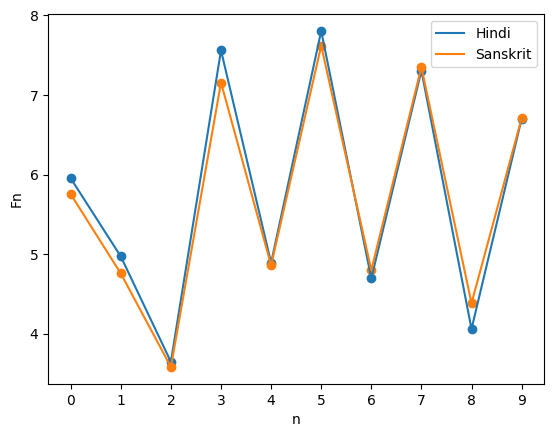

In [18]:
# plot the graph of Fn vs n

plt.plot(df_hindi_entropy['n'], df_hindi_entropy['Fn'], label='Hindi')
plt.plot(df_sanskrit_entropy['n'], df_sanskrit_entropy['Fn'], label='Sanskrit')
plt.scatter(df_hindi_entropy['n'], df_hindi_entropy['Fn'])
plt.scatter(df_sanskrit_entropy['n'], df_sanskrit_entropy['Fn'])
plt.xlabel('n')
plt.xticks(np.arange(0, 10, 1))
plt.ylabel('Fn')
plt.legend()
plt.savefig('./results/ngram/ngram_entropy.png')

plt.show()

